# Sklearn

[![Open in Colab](https://lab.aef.me/files/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/lab/blob/main/files/sklearn.ipynb)
[![Open in Kaggle](https://lab.aef.me/files/assets/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/adamelliotfields/lab/blob/main/files/sklearn.ipynb)
[![Render nbviewer](https://lab.aef.me/files/assets/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/lab/blob/main/files/sklearn.ipynb)
[![Try lite now](https://lab.aef.me/files/assets/badge.svg)](https://lab.aef.me/lab/?path=sklearn.ipynb)

Experiments with [Scikit-learn](https://scikit-learn.org). Mostly based on the official [examples](https://scikit-learn.org/stable/auto_examples/).

**Contents**
* [Datasets](#datasets)
  - [Iris](#iris)
  - [Diabetes](#diabetes)
  - [Linnerud](#linnerud)
  - [Wine](#wine)
  - [Breast Cancer](#breast-cancer)
  - [Digits](#digits)
  - [Bunches](#bunches)
  - [Sample Data Generators](#sample-data-generators)
  - [OpenML](#openml)
* [Unsupervised Learning](#unsupervised-learning)
  - [PCA](#pca)
  - [k-Means Clustering](#k-means-clustering)
  - [t-SNE](#t-sne)
* [Supervised Learning](#supervised-learning)
  - [Support Vector Machines](#support-vector-machines)
  - [Decision Trees](#decision-trees)
  - [Random Forests](#random-forests)

In [1]:
# %pip install -q seaborn

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import (
    load_breast_cancer,
    load_diabetes,
    load_digits,
    load_iris,
    load_linnerud,
    load_sample_image,
    load_wine,
    make_blobs,
    make_circles,
    make_moons,
)
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import Bunch

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**Helpers**

In [3]:
def ds_to_df(dataset: Bunch, categorical=False):
    """Converts a Sklearn dataset to a Pandas DataFrame.\n
    Args:
        dataset (Bunch): Dataset with `data`, `target`, `feature_names`, and `target_names` attributes.
        categorical (bool, optional): Converts `target` column to categorical using `target_names`. Defaults to False.\n
    Returns:
        DataFrame: A Pandas DataFrame.
    """
    if dataset.target.ndim > 1:
        # linnerud (multi-output regression)
        target_columns = [f"target_{i}" for i in range(dataset.target.shape[1])]
    else:
        target_columns = ["target"]

    df = pd.DataFrame(
        np.c_[dataset.data, dataset.target],
        columns=np.append(dataset.feature_names, target_columns),
    )

    if categorical and dataset.target.ndim == 1 and hasattr(dataset, "target_names"):
        df[target_columns[0]] = pd.Categorical.from_codes(
            dataset.target,
            categories=dataset.target_names,
        )

    return df

## Datasets

### Iris

In [4]:
iris = load_iris()
iris_df = ds_to_df(iris, categorical=True)
iris_df.sample(5, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


### Diabetes

In [5]:
diabetes = load_diabetes()
diabetes_df = ds_to_df(diabetes)
diabetes_df.sample(5, random_state=42)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220,219.0
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,70.0
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646,202.0
321,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054,230.0
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362,111.0


### Linnerud

In [6]:
linnerud = load_linnerud()
linnerud_df = ds_to_df(linnerud)
linnerud_df.sample(5, random_state=42)

,Chins,Situps,Jumps,target_0,target_1,target_2
0,5.0,162.0,60.0,191.0,36.0,50.0
17,11.0,230.0,80.0,157.0,32.0,52.0
15,12.0,210.0,120.0,202.0,37.0,62.0
1,2.0,110.0,60.0,189.0,37.0,52.0
8,15.0,200.0,40.0,176.0,31.0,74.0


### Wine

In [7]:
wine = load_wine()
wine_df = ds_to_df(wine, categorical=True)
wine_df.sample(5, random_state=42)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,class_0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,class_0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,class_2
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,class_0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,class_1


### Breast Cancer

In [8]:
breast_cancer = load_breast_cancer()
breast_cancer_df = ds_to_df(breast_cancer, categorical=True)
breast_cancer_df.sample(5, random_state=42)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,benign
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,malignant
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,malignant
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,benign
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,benign


### Digits

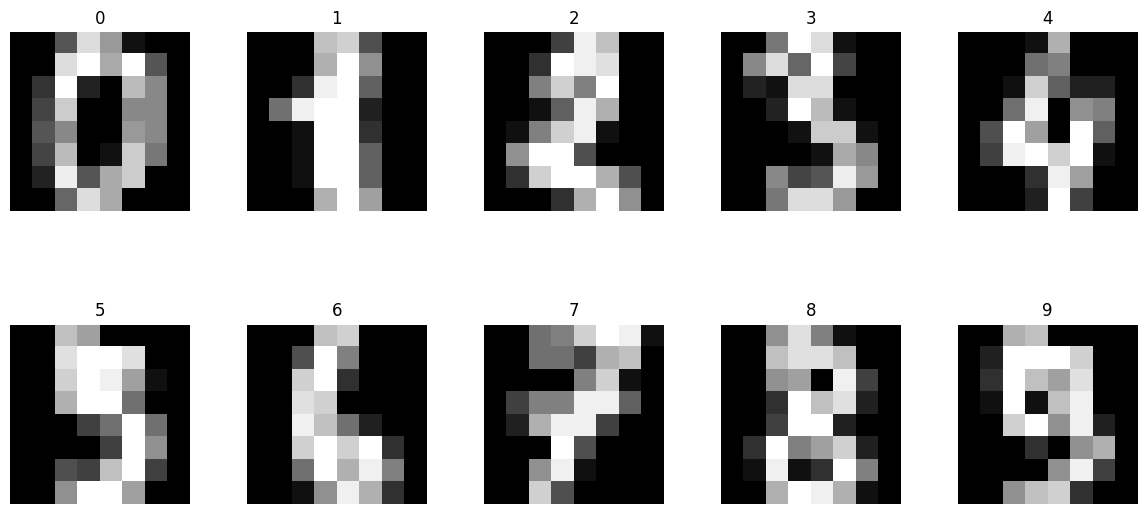

In [9]:
digits = load_digits()
X_digits, y_digits = digits["data"], digits["target"]

# axes will be a 2D array so flatten it
_, axes = plt.subplots(2, 5, figsize=(12, 6))
plt.tight_layout()

for i, ax in enumerate(axes.flatten()):
    # images are supposed to be 8x8
    ax.imshow(X_digits[i].reshape(8, 8), cmap="gray")
    ax.set_title(y_digits[i])
    ax.axis("off")

### Bunches

The datasets are returned as a [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html): a dictionary-like object that exposes its keys as attributes.

You can make your own bunches if you'd like your data to be in the same format:

```python
from sklearn.utils import Bunch

xor = Bunch(
  data=[[0, 0], [0, 1], [1, 0], [1, 1]],
  target=[0, 1, 1, 0],
  target_names=['y'],
  feature_names=['x1', 'x2'],
)
```

### Sample Data Generators

The `datasets` module exports a bunch of sample data generators. The most useful are `make_blobs`, `make_circles`, and `make_moons`. They are helpful for visualizing clustering and classification algorithms.

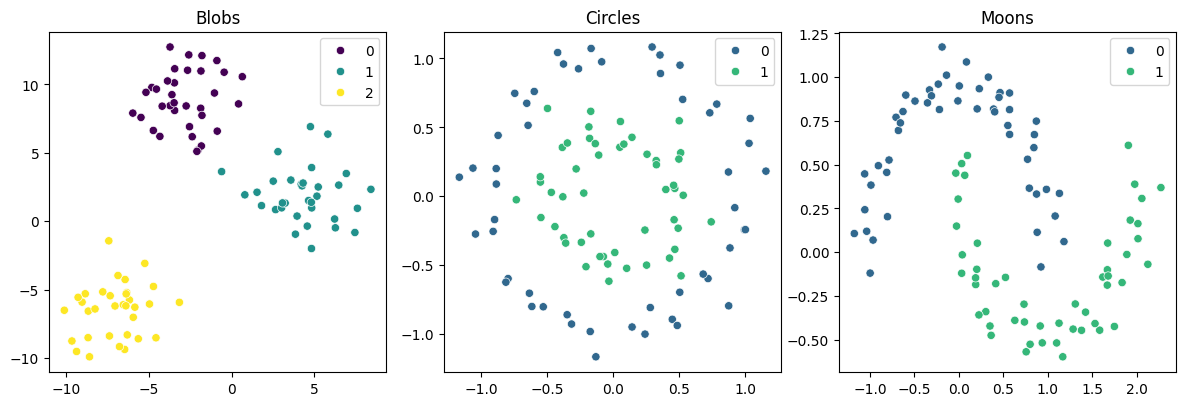

In [10]:
blobs = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=2, random_state=42)
circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
moons = make_moons(n_samples=100, noise=0.1, random_state=42)

samples = [
    (blobs, "Blobs"),
    (circles, "Circles"),
    (moons, "Moons"),
]

_, axes = plt.subplots(1, len(samples), figsize=(12, 4))
plt.tight_layout()

for sample, ax in zip(samples, axes):
    X, y = sample[0]
    X_x, X_y = X[:, 0], X[:, 1]
    ax.set_title(sample[1])
    sns.scatterplot(x=X_x, y=X_y, hue=y, ax=ax, palette="viridis")

### OpenML

The `datasets` module provides a [`fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml) function to download datasets from [OpenML](https://www.openml.org). This functionality has existed since [2018](https://scikit-learn.org/stable/whats_new/v0.20.html#version-0-20-0). It's helpful for getting UCI or Kaggle datasets.

OpenML (Vanschoren et al., [2014](https://arxiv.org/abs/1407.7722)) is sort of like a Hugging Face Hub for more traditional machine learning (rather than LLMs).

Sklearn stores datasets in `~/scikit_learn_data` by default; set the `SCIKIT_LEARN_DATA` environment variable or pass the `data_home` keyword argument to specify a different location.

Here are some interesting datasets to explore.

#### Regression

```py
# Capital Bikeshare (predict count)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=1414
bikeshare = fetch_openml(data_id=1414)

# Moneyball (predict runs scored)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=41021
moneyball = fetch_openml(data_id=41021)

# Ames Housing (predict sale price)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=43926
ames = fetch_openml(data_id=43926)

# Avocado Sales (predict average price)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=43927
avocados = fetch_openml(data_id=43927)
```

#### Binary Classification

```py
# Spambase (predict if spam)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=44
spambase = fetch_openml(data_id=44)

# Bank Marketing (predict if client will subscribe)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=1461
bank = fetch_openml(data_id=1461)

# Phishing Websites (predict if website is phishing)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=4534
phishing = fetch_openml(data_id=4534)

# Amazon Employee Access (predict if access approved)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=4135
amazon = fetch_openml(data_id=4135)

# Speed Dating (predict if match)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=40536
speed_dating = fetch_openml(data_id=40536)

# Mushroom (predict if poisonous)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=24
mushrooms = fetch_openml(data_id=24)
```

#### Multiclass Classification

```py
# Yeast (predict protein localization site)
# https://www.openml.org/search?sort=runs&status=active&type=data&id=181
yeast = fetch_openml(data_id=181)
```

#### Multilabel Classification

Like multiclass, except each instance can have multiple labels.

```py
# Slashdot
# https://www.openml.org/search?sort=runs&status=active&type=data&id=41472
slashdot = fetch_openml(data_id=41472)

# Image
# https://www.openml.org/search?sort=runs&status=active&type=data&id=41546
images = fetch_openml(data_id=41546)
```

## Unsupervised Learning

### PCA

[PCA](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca) (principal component analysis) is a linear dimensionality reduction technique. The first principal component is the direction of maximum variance, the second is orthogonal to the first and has the second largest variance, and so on.

In [11]:
wine = load_wine()
X_wine, y_wine = wine["data"], wine["target"]

# make_pipeline is like `Pipeline` except it automatically names the steps
scaled_pca = make_pipeline(
    StandardScaler(),
    PCA(n_components=2, random_state=42),
)

pca_wine = scaled_pca.fit_transform(X_wine)
pca_wine_x = pca_wine[:, 0]
pca_wine_y = pca_wine[:, 1]

# print explained variance as percentage
for i, explained_variance in enumerate(scaled_pca.named_steps["pca"].explained_variance_ratio_):
    print(f"PCA {i + 1}: {explained_variance:.2%} explained variance")

PCA 1: 36.20% explained variance
PCA 2: 19.21% explained variance


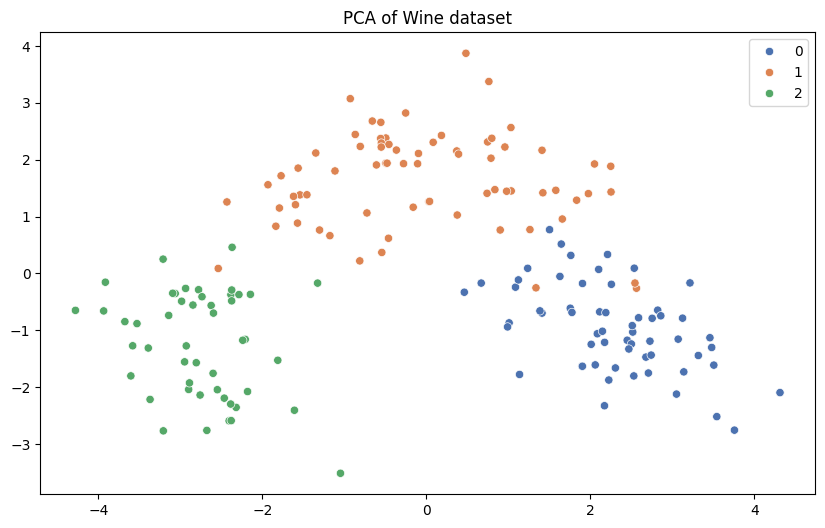

In [12]:
# plot pca
plt.figure(figsize=(10, 6))
plt.title("PCA of Wine dataset")
sns.scatterplot(x=pca_wine_x, y=pca_wine_y, hue=y_wine, palette="deep");

### k-Means Clustering

[k-means](https://scikit-learn.org/stable/modules/clustering.html#k-means) clusters data by minimizing the sum of squared distances between each point and the centroid of its cluster.

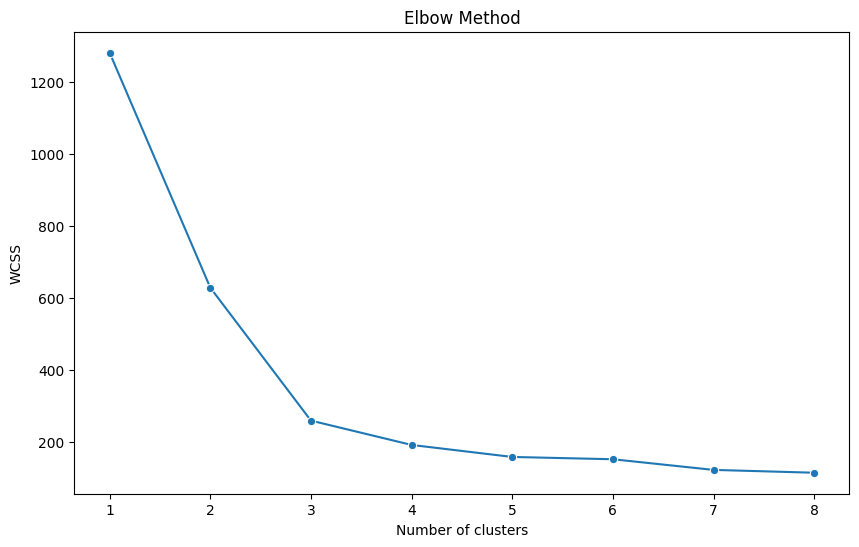

In [13]:
# calculate WCSS (within-cluster sum-of-squares) for 8 clusters using the PCA data (above)
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_wine)
    wcss.append(kmeans.inertia_)

# plot elbow
# notice how after `3` the slope is less steep
plt.figure(figsize=(10, 6))
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
sns.lineplot(x=range(1, 9), y=wcss, marker="o");

In [14]:
# calculate silhouette scores
# notice how 3 clusters has the highest score
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred_wine = kmeans.fit_predict(pca_wine)
    silhouette = silhouette_score(pca_wine, y_pred_wine)
    print(f"n_clusters = {n_clusters}, silhouette = {silhouette}")

n_clusters = 2, silhouette = 0.4750102141135033
n_clusters = 3, silhouette = 0.5601697480957203
n_clusters = 4, silhouette = 0.49142133957103173
n_clusters = 5, silhouette = 0.44987373709182155


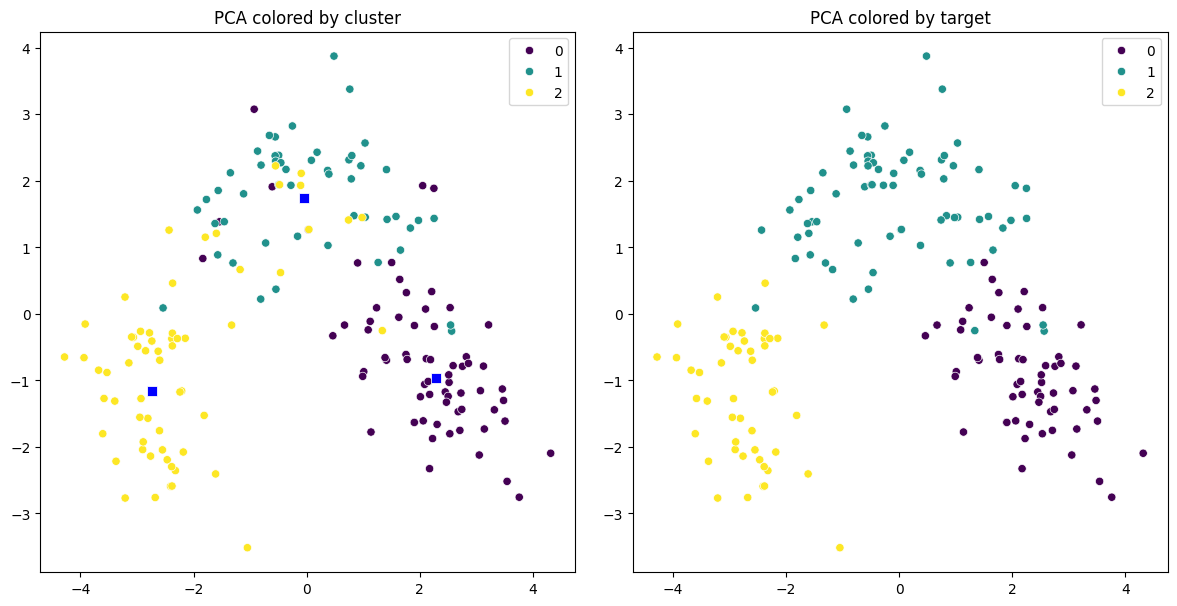

In [15]:
# plot principal components colored by cluster vs target
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred_wine = kmeans.fit_predict(pca_wine)

# cluster centers for plot
centroids_wine_x = kmeans.cluster_centers_[:, 0]
centroids_wine_y = kmeans.cluster_centers_[:, 1]

_, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout()
ax[0].set_title("PCA colored by cluster")
ax[1].set_title("PCA colored by target")
sns.scatterplot(x=pca_wine_x, y=pca_wine_y, hue=sorted(y_pred_wine), palette="viridis", ax=ax[0])
sns.scatterplot(
    x=centroids_wine_x,
    y=centroids_wine_y,
    color="blue",
    marker="s",
    s=50,
    ax=ax[0],
)
sns.scatterplot(x=pca_wine_x, y=pca_wine_y, hue=y_wine, palette="viridis", ax=ax[1]);

#### k-Means Image Color Quantization

This involves grouping colors into $k$ clusters. Each color is represented by the centroid of its cluster, which is the average of all the colors in the cluster.

Because we are using only 64 colors, this is **6-bit** quantization, because $2^6 = 64$.

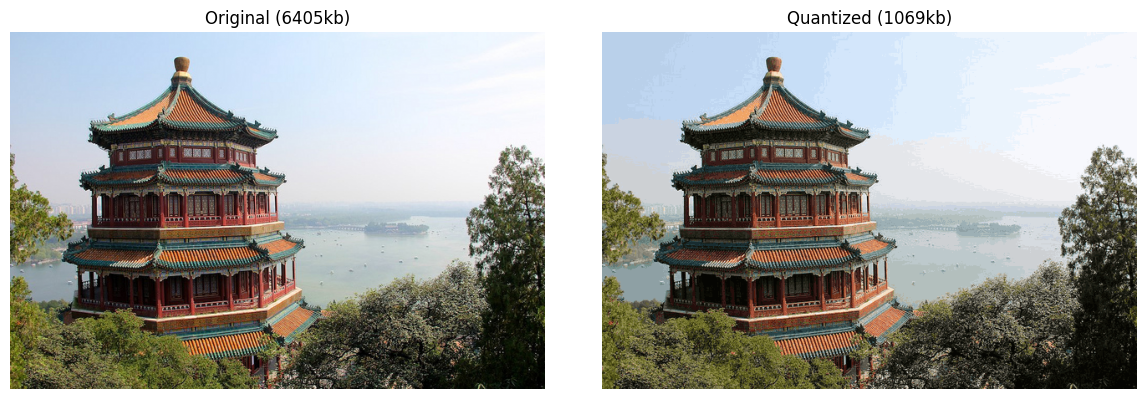

In [16]:
# numpy array
china = load_sample_image("china.jpg")

# reduce to only 64 colors (original is 96k+)
n_colors = 64

# convert to float and divide by 255
china = np.array(china, dtype=np.float64) / 255

# transform to 2D
w, h, d = tuple(china.shape)
china_2d = np.reshape(china, (w * h, d))

# fit k-means
# you can sample the image to speed up fitting
kmeans_image = KMeans(n_clusters=n_colors, random_state=42)
kmeans_image.fit(china_2d)

# get labels
y_pred_image = kmeans_image.predict(china_2d)

# recreate image
china_q_6 = kmeans_image.cluster_centers_[y_pred_image].reshape(w, h, -1)

# calculate sizes
china_size = china.nbytes / 1024
china_q_6_size = (kmeans_image.cluster_centers_.nbytes + y_pred_image.nbytes) / 1024

# plot original and quantized side-by-side
_, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.tight_layout()
for i, img in enumerate([china, china_q_6]):
    ax[i].set_title([f"Original ({china_size:.0f}kb)", f"Quantized ({china_q_6_size:.0f}kb)"][i])
    ax[i].imshow(img)
    ax[i].axis("off")

### t-SNE

Unlike PCA, which can be used for feature extraction, t-SNE is mainly used for visualization. It doesn't preserve distances; rather, it focuses on local structures. In the figure below, you'll see tight clusters of digits with lots of space between clusters. The space doesn't mean that certain numbers are "further away" than others; rather, it's just how the algorithm lays them out.

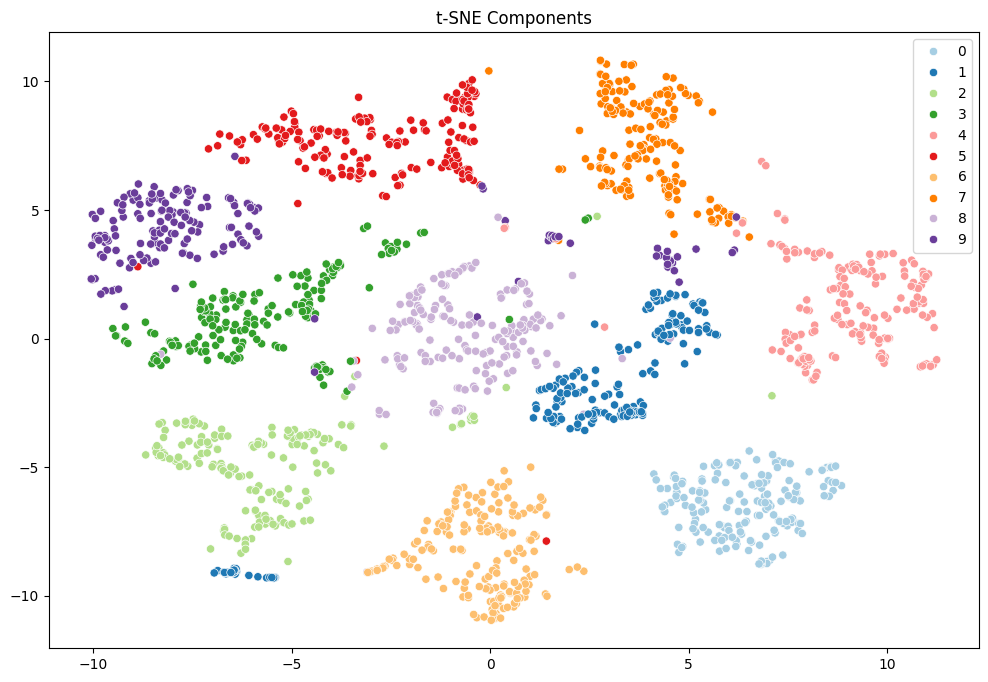

In [17]:
digits = load_digits()
X_digits, y_digits = digits["data"], digits["target"]

# note that you can PCA before t-SNE if necessary
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

# t-SNE transform
tsne = TSNE(n_components=2, random_state=42, n_iter=300)
tsne_digits = tsne.fit_transform(X_digits_scaled)
tsne_digits_x = tsne_digits[:, 0]
tsne_digits_y = tsne_digits[:, 1]

# plot t-SNE components colored by target
plt.figure(figsize=(12, 8))
plt.title("t-SNE Components")
sns.scatterplot(
    x=tsne_digits_x,
    y=tsne_digits_y,
    hue=y_digits,
    palette="Paired",  # colorbrewer2.org
);

## Supervised Learning

### Support Vector Machines

[SVM](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)s attempt to find the _hyperplane_ that best divides the data into two classes. The _support vectors_ are the points closest to the hyperplane. Hyperplanes are always 1 dimension less than their ambient space. For example, in 2D (like a scatter plot), the hyperplane is a line. They work great for medium-sized datasets and can handle high-dimensional data; however, the fitting time grows quadratically with the number of samples in the dataset. This can make them impractical once the dataset grows to tens of thousands of samples.

SVMs are inherently binary classifiers. However, they can be extended to multiple classes using the _one-vs-one_ or _one-vs-rest_ (default) strategies. In OvO, a binary classifier is trained for each pair of classes. In OvR, a binary classifier is trained for each class against the rest. Scikit-learn implements this transparently so you just need to pick the strategy that works the best.

When used as a classifier, the SVM is known as a [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). SVMs _can_ be used for regression, but not as common.

The decision boundary of the classifier is determined by the kernel function. The boundary is chosen to maximize the margin (space) between the support vectors. The default, radial basis function (RBF), can handle non-linear data. The linear kernel is best for linearly separable data. When the data has more features than samples (wide), using non-linear kernels like RBF can lead to overfitting.

The `C` parameter controls the regularization strength, which balances the trade-off between maximizing the margin and classification accuracy. This needs to be tuned for each dataset. Each kernel has a different coefficient that needs to be tuned as well. The `gamma` parameter controls the width of the RBF kernel. A small `gamma` means a large variance and a smooth decision boundary. A large `gamma` means a small variance and a more complex decision boundary.

Under the hood, Scikit-learn uses the [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) C++ library via [Cython](https://cython.org). For large datasets, the `LinearSVC` class (which uses a linear kernel function) is faster as it is implemented by the [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/) C++ library.

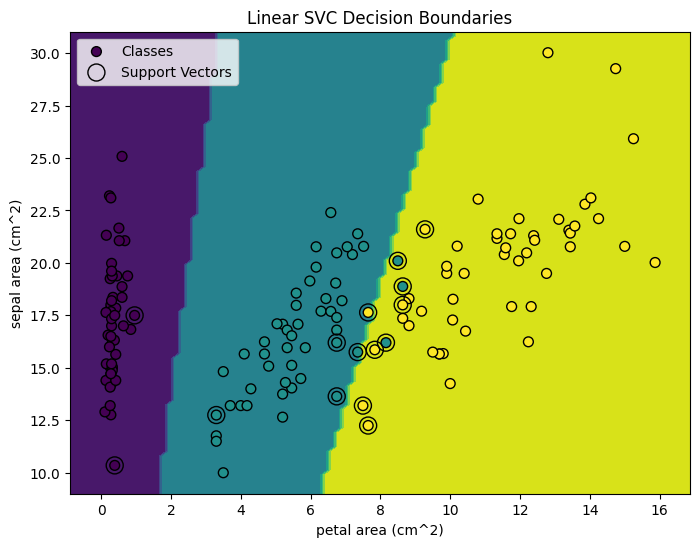

In [18]:
# linear kernel
iris = load_iris()
iris_df = ds_to_df(iris)

# feature engineer petal area and sepal area
p_area, p_length, p_width = "petal area (cm^2)", "petal length (cm)", "petal width (cm)"
s_area, s_length, s_width = "sepal area (cm^2)", "sepal length (cm)", "sepal width (cm)"
iris_df[p_area] = iris_df[p_length] * iris_df[p_width]
iris_df[s_area] = iris_df[s_length] * iris_df[s_width]

# for plotting we can only use 2 features
X_iris = iris_df[[p_area, s_area]]
y_iris = iris_df["target"]

svc_linear = SVC(kernel="linear", C=1, random_state=42)
svc_linear.fit(X_iris, y_iris)

support_vectors_x = svc_linear.support_vectors_[:, 0]
support_vectors_y = svc_linear.support_vectors_[:, 1]

# plot decision boundaries, true classes, and support vectors
plt.figure(figsize=(8, 6))
plt.title("Linear SVC Decision Boundaries")
DecisionBoundaryDisplay.from_estimator(
    svc_linear,
    X_iris,
    cmap="viridis",
    ax=plt.gca(),
)
plt.scatter(
    X_iris[p_area],
    X_iris[s_area],
    s=50,
    c=y_iris,
    cmap="viridis",
    edgecolors="k",
    label="Classes",
)
plt.scatter(
    support_vectors_x,
    support_vectors_y,
    s=150,
    facecolors="none",
    edgecolors="k",
    label="Support Vectors",
)
plt.legend();

### Decision Trees

A decision tree is a flowchart-like structure where each internal node represents a "test" on a feature (e.g., if a petal is longer than 2 cm), each branch represents the outcome of the test, and each leaf represents the class label (decision).

The `criterion` parameter controls the function to measure the quality of a split. The default is Gini impurity, which measures how often a randomly chosen element would be incorrectly classified _if_ it were randomly labeled according to the distribution of labels in the node. The other options are `entropy` and `log_loss`. The reduction of entropy after a split is referred to as [information gain](https://en.wikipedia.org/wiki/Information_gain_(decision_tree)), while log-loss is a measure of the probability of the true class. Note that `log_loss` was recently added in [`v1.1.0`](https://scikit-learn.org/stable/whats_new/v1.1.html#version-1-1-0). Also read [information theory](https://en.wikipedia.org/wiki/Information_theory) and [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence).

The `min_samples_split` parameter controls the minimum number of samples required to split an internal node (default `2`). The `min_samples_leaf` parameter controls the minimum number of samples required to be at a leaf node (default `1`). The `max_features` parameter controls the number of features to consider when looking for the best split (default `None` or "all features").

The `max_depth` parameter controls the maximum depth of the tree. The default is `None`, which means the tree will grow until all leaves are pure or contain less than `min_samples_split` samples. The `min_impurity_decrease` parameter controls the minimum impurity decrease required for a split to happen (default `0.0`).

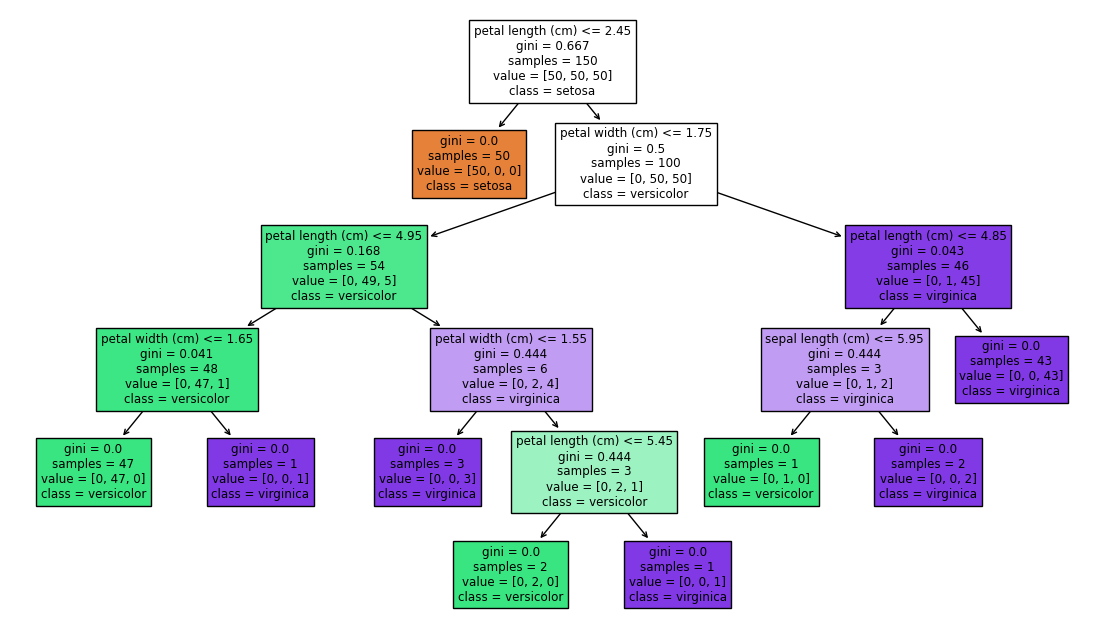

In [19]:
iris = load_iris()
X_iris, y_iris = iris["data"], iris["target"]

tree_iris = DecisionTreeClassifier(random_state=42)
tree_iris.fit(X_iris, y_iris)

plt.figure(figsize=(14, 8))
plot_tree(
    tree_iris,
    filled=True,
    feature_names=iris["feature_names"],
    class_names=iris["target_names"],
);

#### Feature Importance

After training, analyzing the feature importances can provide insights into how the model makes decisions.

In [20]:
for i, importance in enumerate(tree_iris.feature_importances_):
    print(f"{iris['feature_names'][i]}: {importance:.2%}")

sepal length (cm): 1.33%
sepal width (cm): 0.00%
petal length (cm): 56.41%
petal width (cm): 42.26%


### Random Forests

A _Random Forest_ is an ensemble method that builds multiple decision trees and outputs the mode (classification) or mean (regression) of the individual trees.

It is a _bagging_ (bootstrap aggregating) method, which means that each tree is trained on a random subset of the data. Bootstrap sampling is randomly selecting samples with replacement, so some samples may be selected multiple times and others not at all. This is done to reduce variance (overfitting) (see [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)). Since there will be samples not in the training set for each tree, there will automatically be a test set to evaluate each tree on. This is known as the _out-of-bag_ (OOB) error estimate.

#### Classification

In [21]:
wine = load_wine()
X_wine, y_wine = wine["data"], wine["target"]

rf_wine = RandomForestClassifier(n_estimators=100, random_state=42)
rf_wine_cv = cross_val_score(rf_wine, X_wine, y_wine, cv=5, n_jobs=-1)

print(f"Accuracy per fold: {[f'{acc:.2%}' for acc in rf_wine_cv]}")
print(f"Mean accuracy: {rf_wine_cv.mean():.2%}")

Accuracy per fold: ['97.22%', '94.44%', '97.22%', '97.14%', '100.00%']
Mean accuracy: 97.21%


#### Regression

TBD